In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp


In [2]:
df=pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:

print(df.info())


print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)


In [5]:
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type', 'reservation_status']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [6]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str),
                                    format='%Y-%B-%d')


In [7]:
duplicates_count = df.duplicated().sum()
print(f'Duplicates found: {duplicates_count}')

# Remove duplicates if any
if duplicates_count > 0:
    df = df.drop_duplicates()


Duplicates found: 31994


In [8]:
print(df[df['lead_time'] < 0])  
print(df[df['adr'] < 0])        

df = df[df['adr'] >= 0]


Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, arrival_date]
Index: []

[0 rows x 33 columns]
              hotel  is_canceled  lead_time  arrival_date_year  \
14969  Resort Hotel            0        195               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14969              March                        10                          5   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
1

In [9]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)


**Basic Level Questions**

In [10]:
average_lead_time = df['lead_time'].mean()
print(f"The average lead time for bookings is {average_lead_time:.2f} days.")


The average lead time for bookings is 79.89 days.


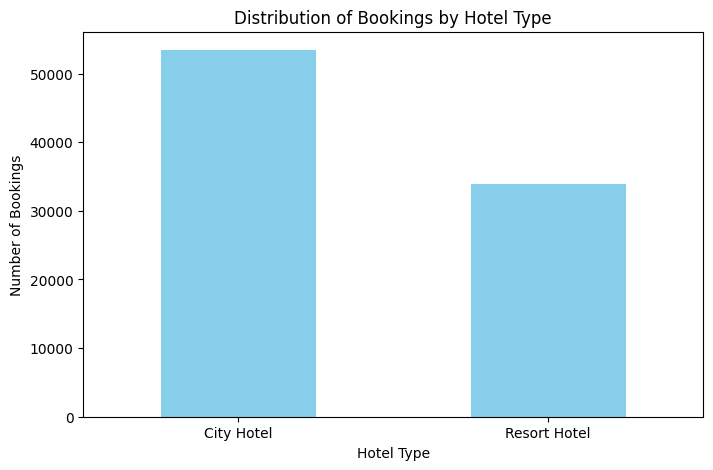

In [11]:
# Count bookings by hotel type using pandas
booking_counts = df['hotel'].value_counts()

# Plot using pandas built-in plotting (matplotlib)
booking_counts.plot(kind='bar', color='skyblue', figsize=(8,5))

mp.title('Distribution of Bookings by Hotel Type')
mp.xlabel('Hotel Type')
mp.ylabel('Number of Bookings')
mp.xticks(rotation=0)
mp.show()


In [12]:
total_cancellations = df['is_canceled'].sum()
print(f"Total number of canceled bookings: {total_cancellations}")


Total number of canceled bookings: 24025


In [13]:
most_common_month = df['arrival_date_month'].mode()[0]
print(f"The most common arrival month for bookings is: {most_common_month}")


The most common arrival month for bookings is: August


In [14]:
average_special_requests = df['total_of_special_requests'].mean()
print(f"The average number of special requests per booking is: {average_special_requests:.2f}")


The average number of special requests per booking is: 0.70


In [15]:
top_country = df['country'].value_counts().idxmax()
top_country_count = df['country'].value_counts().max()

print(f"The country with the highest number of bookings is: {top_country} with {top_country_count} bookings.")


The country with the highest number of bookings is: PRT with 27453 bookings.


In [16]:
average_adr_by_hotel = df.groupby('hotel', observed=True)['adr'].mean().reset_index()
print(average_adr_by_hotel)


          hotel         adr
0    City Hotel  110.985944
1  Resort Hotel   99.028449


In [17]:
total_bookings = len(df)
bookings_with_parking = df[df['required_car_parking_spaces'] > 0].shape[0]

percentage_with_parking = (bookings_with_parking / total_bookings) * 100

print(f"Percentage of guests requiring car parking spaces: {percentage_with_parking:.2f}%")


Percentage of guests requiring car parking spaces: 8.37%


In [18]:
avg_week_nights = df['stays_in_week_nights'].mean()
avg_weekend_nights = df['stays_in_weekend_nights'].mean()

print(f"Average stay duration on week nights: {avg_week_nights:.2f} nights")
print(f"Average stay duration on weekend nights: {avg_weekend_nights:.2f} nights")


Average stay duration on week nights: 2.63 nights
Average stay duration on weekend nights: 1.01 nights


In [19]:
bookings_with_agents = df[df['agent'] != 0].shape[0]
print(f"Number of bookings made through travel agents: {bookings_with_agents}")


Number of bookings made through travel agents: 75202


**Medium Level Questions**

In [20]:
cancellation_rate_by_hotel = df.groupby('hotel', observed=True)['is_canceled'].mean().reset_index()
cancellation_rate_by_hotel.columns = ['Hotel Type', 'Cancellation Rate']

print(cancellation_rate_by_hotel)


     Hotel Type  Cancellation Rate
0    City Hotel           0.300386
1  Resort Hotel           0.234816


In [21]:
average_adr_by_segment = df.groupby('market_segment', observed=True)['adr'].mean().reset_index()
average_adr_by_segment.columns = ['Market Segment', 'Average ADR']

print(average_adr_by_segment)


  Market Segment  Average ADR
0       Aviation   100.170396
1  Complementary     3.049245
2      Corporate    68.151246
3         Direct   116.579429
4         Groups    74.880727
5  Offline TA/TO    81.764191
6      Online TA   118.171606
7      Undefined    15.000000


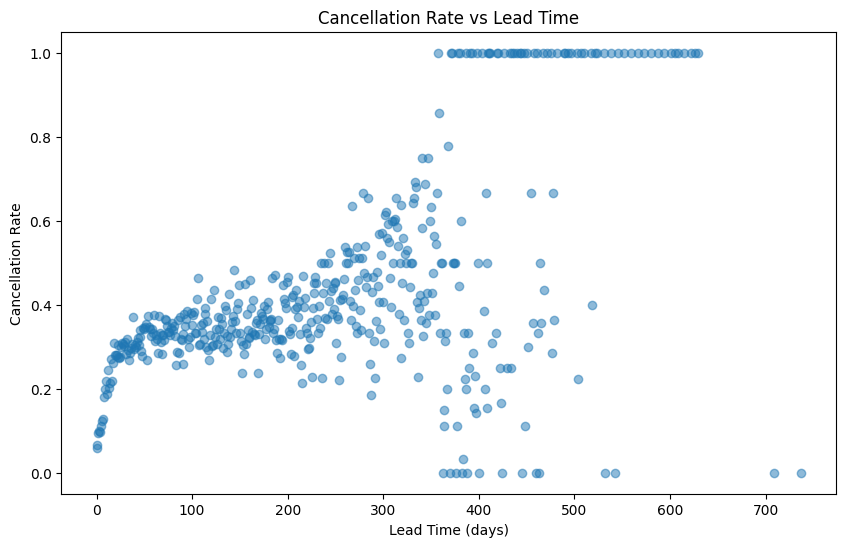

In [22]:

lead_time_cancellation = df.groupby('lead_time', observed=True)['is_canceled'].mean().reset_index()

# Plot
mp.figure(figsize=(10,6))
mp.scatter(lead_time_cancellation['lead_time'], lead_time_cancellation['is_canceled'], alpha=0.5)
mp.title('Cancellation Rate vs Lead Time')
mp.xlabel('Lead Time (days)')
mp.ylabel('Cancellation Rate')
mp.show()


In [23]:
# Count bookings per distribution channel
distribution_counts = df['distribution_channel'].value_counts()

# Get the top distribution channel and its count
top_channel = distribution_counts.idxmax()
top_count = distribution_counts.max()

print(f"The distribution channel with the highest bookings is '{top_channel}' with {top_count} bookings.")


The distribution channel with the highest bookings is 'TA/TO' with 69141 bookings.


In [24]:
avg_prev_cancellations = df.groupby('hotel', observed=True)['previous_cancellations'].mean().reset_index()
avg_prev_cancellations.columns = ['Hotel Type', 'Average Previous Cancellations']

print(avg_prev_cancellations)


     Hotel Type  Average Previous Cancellations
0    City Hotel                        0.035768
1  Resort Hotel                        0.021992


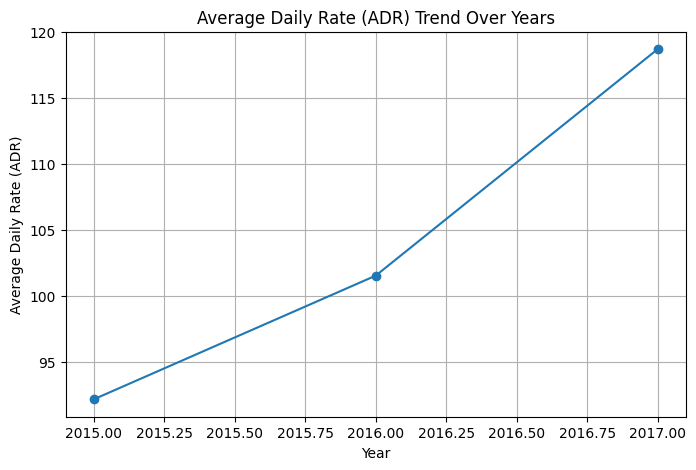

In [25]:
# Calculate average ADR per year
adr_yearly = df.groupby('arrival_date_year', observed=True)['adr'].mean().reset_index()

# Plot the trend
mp.figure(figsize=(8,5))
mp.plot(adr_yearly['arrival_date_year'], adr_yearly['adr'], marker='o')
mp.title('Average Daily Rate (ADR) Trend Over Years')
mp.xlabel('Year')
mp.ylabel('Average Daily Rate (ADR)')
mp.grid(True)
mp.show()


Month with highest revenue: August ($7240652.99)


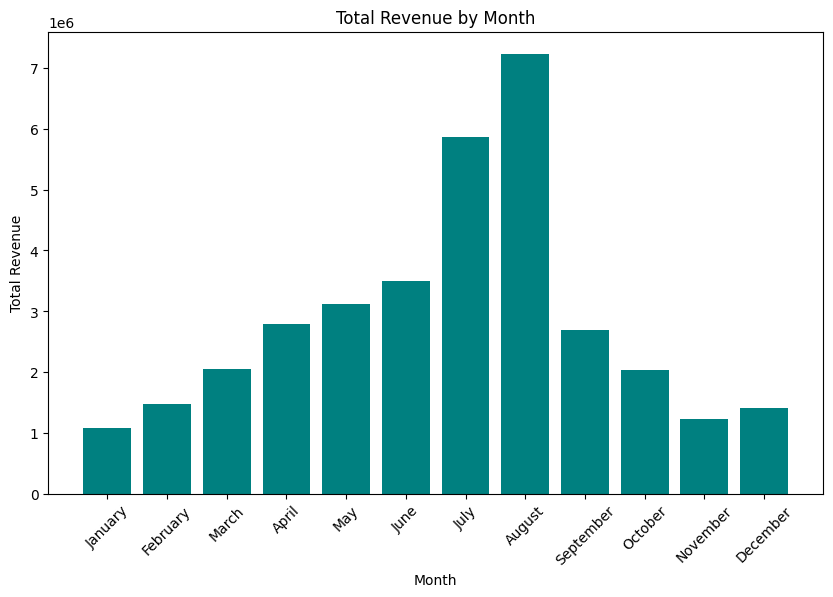

In [26]:
# Calculate total stay nights per booking
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Calculate revenue per booking
df['revenue'] = df['adr'] * df['total_nights']

# Group by month and sum revenue
monthly_revenue = df.groupby('arrival_date_month', observed=True)['revenue'].sum().reset_index()

# To get months in calendar order, define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['arrival_date_month'] = pd.Categorical(monthly_revenue['arrival_date_month'], categories=month_order, ordered=True)

# Sort by month order
monthly_revenue = monthly_revenue.sort_values('arrival_date_month')

# Display month with highest revenue
top_month = monthly_revenue.loc[monthly_revenue['revenue'].idxmax()]

print(f"Month with highest revenue: {top_month['arrival_date_month']} (${top_month['revenue']:.2f})")

mp.figure(figsize=(10,6))
mp.bar(monthly_revenue['arrival_date_month'], monthly_revenue['revenue'], color='teal')
mp.title('Total Revenue by Month')
mp.xlabel('Month')
mp.ylabel('Total Revenue')
mp.xticks(rotation=45)
mp.show()


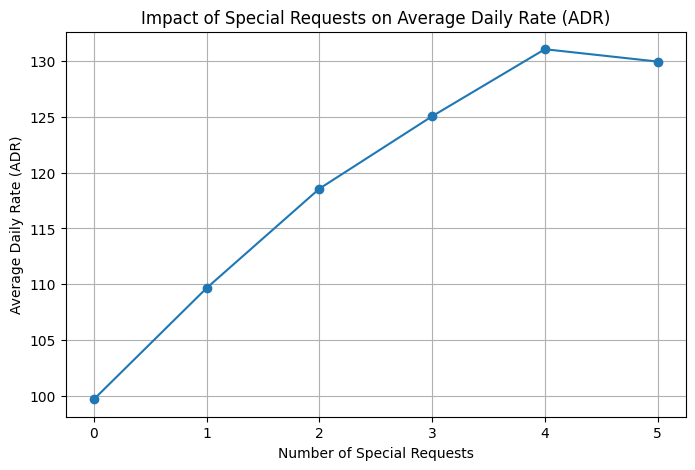

In [27]:
# Calculate average ADR for each count of special requests
adr_by_special_requests = df.groupby('total_of_special_requests', observed=True)['adr'].mean().reset_index()

# Plot the relationship
mp.figure(figsize=(8,5))
mp.plot(adr_by_special_requests['total_of_special_requests'], adr_by_special_requests['adr'], marker='o')
mp.title('Impact of Special Requests on Average Daily Rate (ADR)')
mp.xlabel('Number of Special Requests')
mp.ylabel('Average Daily Rate (ADR)')
mp.grid(True)
mp.show()


In [28]:
# Calculate total stay duration per booking
df['total_stay_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Group by repeated guest flag and calculate average stay duration
avg_stay_by_guest_type = df.groupby('is_repeated_guest', observed=True)['total_stay_nights'].mean().reset_index()

# Rename for clarity
avg_stay_by_guest_type['guest_type'] = avg_stay_by_guest_type['is_repeated_guest'].map({0: 'New Guests', 1: 'Repeated Guests'})
avg_stay_by_guest_type = avg_stay_by_guest_type[['guest_type', 'total_stay_nights']]

print(avg_stay_by_guest_type)


        guest_type  total_stay_nights
0       New Guests           3.699932
1  Repeated Guests           1.924722


In [29]:
# Count bookings per reserved room type
room_type_counts = df['reserved_room_type'].value_counts()

# Get the top room type and its count
top_room_type = room_type_counts.idxmax()
top_count = room_type_counts.max()

print(f"The room type with the highest number of bookings is '{top_room_type}' with {top_count} bookings.")


The room type with the highest number of bookings is 'A' with 56551 bookings.


**Advanced Level Questions**

In [30]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Features and target
features = ['lead_time', 'booking_changes', 'total_of_special_requests', 'adr', 'required_car_parking_spaces']
X = df[features].fillna(0)  # fill missing if any
y = df['is_canceled']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_prob))

# Feature coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


              precision    recall  f1-score   support

           0       0.76      0.95      0.84     19030
           1       0.60      0.19      0.29      7189

    accuracy                           0.74     26219
   macro avg       0.68      0.57      0.56     26219
weighted avg       0.71      0.74      0.69     26219

ROC AUC score: 0.7225236167213192
                       Feature  Coefficient
4  required_car_parking_spaces    -2.284578
3                          adr     0.436967
0                    lead_time     0.417911
2    total_of_special_requests    -0.368150
1              booking_changes    -0.340340


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features and target
features = ['adults', 'children', 'babies']
X = df[features].fillna(0)
y = df['adr']

# Split data into train/test (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print(coef_df)

# Optional: Evaluate model performance on test set
r2 = model.score(X_test, y_test)
print(f"R-squared on test set: {r2:.3f}")


Intercept: 63.39608743654406
    Feature  Coefficient
0    adults    19.929444
1  children    38.378652
2    babies     5.901602
R-squared on test set: 0.196


In [33]:
correlation = df['booking_changes'].corr(df['total_of_special_requests'])
print(f"Correlation between booking changes and special requests: {correlation:.3f}")


Correlation between booking changes and special requests: 0.016


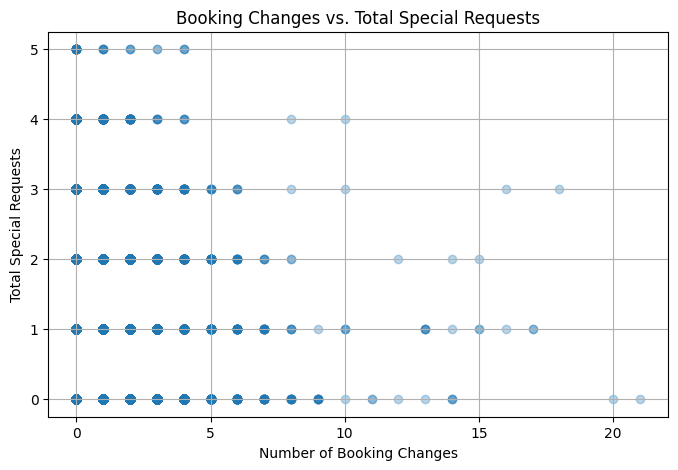

In [34]:
mp.figure(figsize=(8,5))
mp.scatter(df['booking_changes'], df['total_of_special_requests'], alpha=0.3)
mp.title('Booking Changes vs. Total Special Requests')
mp.xlabel('Number of Booking Changes')
mp.ylabel('Total Special Requests')
mp.grid(True)
mp.show()


In [35]:
season_map = {
    'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Map months to seasons
df['season'] = df['arrival_date_month'].map(season_map)

# Calculate cancellation rate per month
cancel_rate_month = df.groupby('arrival_date_month', observed=True)['is_canceled'].mean().reset_index()

# Order months properly for display
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
cancel_rate_month['arrival_date_month'] = pd.Categorical(cancel_rate_month['arrival_date_month'], categories=month_order, ordered=True)
cancel_rate_month = cancel_rate_month.sort_values('arrival_date_month')

print(cancel_rate_month)


   arrival_date_month  is_canceled
4             January     0.221180
3            February     0.232043
7               March     0.243610
0               April     0.304628
8                 May     0.292280
6                June     0.303155
5                July     0.317987
1              August     0.321844
11          September     0.245441
10            October     0.236804
9            November     0.211011
2            December     0.268564


In [36]:
cancel_rate_season = df.groupby('season')['is_canceled'].mean().reset_index()
print(cancel_rate_season)


   season  is_canceled
0  Autumn     0.232988
1  Spring     0.281009
2  Summer     0.315520
3  Winter     0.240610


<Figure size 1200x600 with 0 Axes>

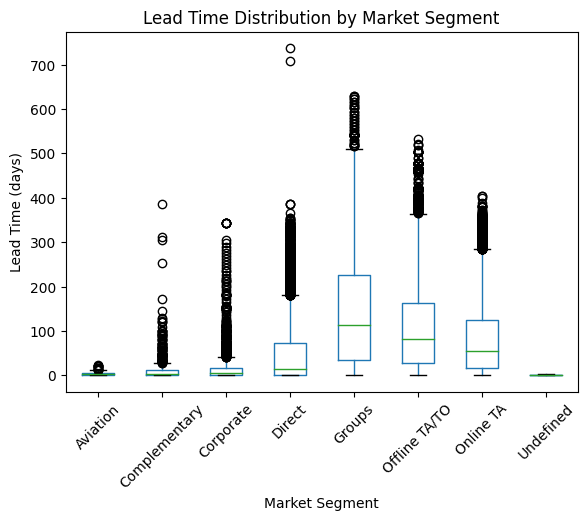

In [37]:
mp.figure(figsize=(12,6))

# Create boxplot with pandas
df.boxplot(column='lead_time', by='market_segment', grid=False, rot=45, fontsize=10)

mp.title('Lead Time Distribution by Market Segment')
mp.suptitle('')  # remove automatic title to clean plot
mp.xlabel('Market Segment')
mp.ylabel('Lead Time (days)')
mp.show()
